In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
# sns.set_theme(color_codes=True)

In [56]:
df = pd.read_csv('docs/data_arrhythmia.csv', delimiter=';', na_values='?')
df.head(15)

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0,0.8,0.9,20.1,25.1,10


In [57]:
df.shape

(452, 280)

In [58]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs',
       ...
       'KY', 'KZ', 'LA', 'LB', 'LC', 'LD', 'LE', 'LF', 'LG', 'diagnosis'],
      dtype='object', length=280)

In [59]:
numeric_features.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [60]:
qr_feature = [feature for feature in numeric_features if 'qr' in feature or 'QR' in feature]
qr_feature

['qrs_duration', 'qrs', 'QRST']

In [65]:
for feature in qr_feature:
    print(feature, np.sort(df[feature].unique()))

qrs_duration [ 55  61  62  63  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 113 114 118 121 123
 131 132 133 137 138 140 146 147 153 163 170 185 188]
qrs [-172 -166 -158 -137  -85  -73  -67  -63  -62  -60  -58  -57  -56  -55
  -52  -51  -50  -49  -48  -46  -44  -40  -39  -38  -37  -36  -34  -32
  -31  -29  -27  -26  -25  -24  -22  -21  -20  -19  -18  -16  -15  -14
  -13  -12  -11  -10   -8   -7   -6   -5   -4   -2   -1    0    1    2
    3    4    5    7    8    9   10   11   12   13   14   15   16   17
   18   19   20   21   22   23   24   25   26   27   28   29   30   31
   32   33   34   35   36   37   38   39   40   41   42   43   44   45
   46   47   48   49   50   51   52   53   54   55   56   57   58   59
   60   61   62   63   64   65   66   67   68   69   70   71   72   73
   74   75   76   77   78   79   80   81   82   83   84   85   86   87


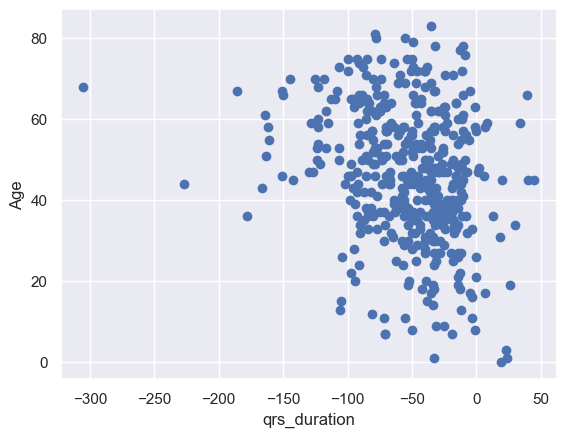

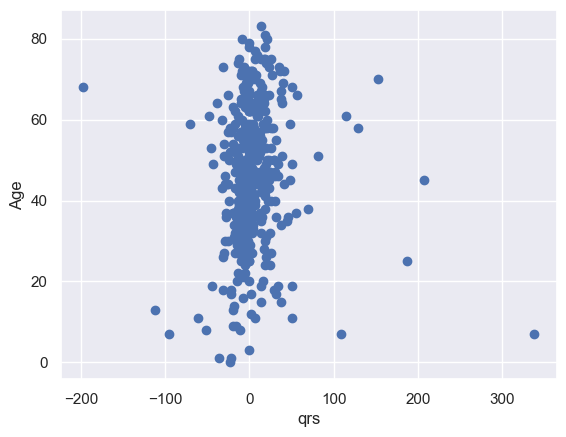

In [66]:
for feature in qr_feature:
    if feature != 'QRST':
        data = df.copy()
        data[feature] = data['QRST'] - data[feature]
        plt.scatter(data[feature], data['age'])
        plt.xlabel(feature)
        plt.ylabel('Age')
        plt.show()

### EDA
- Problem -> Data -> Analysis -> Model -> Conclusion

In [27]:
new_column = ['age', 'sex', 'height', 'weight', 'qrs_duration', 'qrs', 'heart_rate', 'diagnosis']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to diagnosis
dtypes: float64(121), int64(159)
memory usage: 988.9 KB


In [28]:
missing_data = pd.DataFrame({'total missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum() / 82790) * 100})
missing_data

,total missing,perc_missing
age,0,0.0
sex,0,0.0
height,0,0.0
weight,0,0.0
qrs_duration,0,0.0
...,...,...
LD,0,0.0
LE,0,0.0
LF,0,0.0
LG,0,0.0


In [29]:
df.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


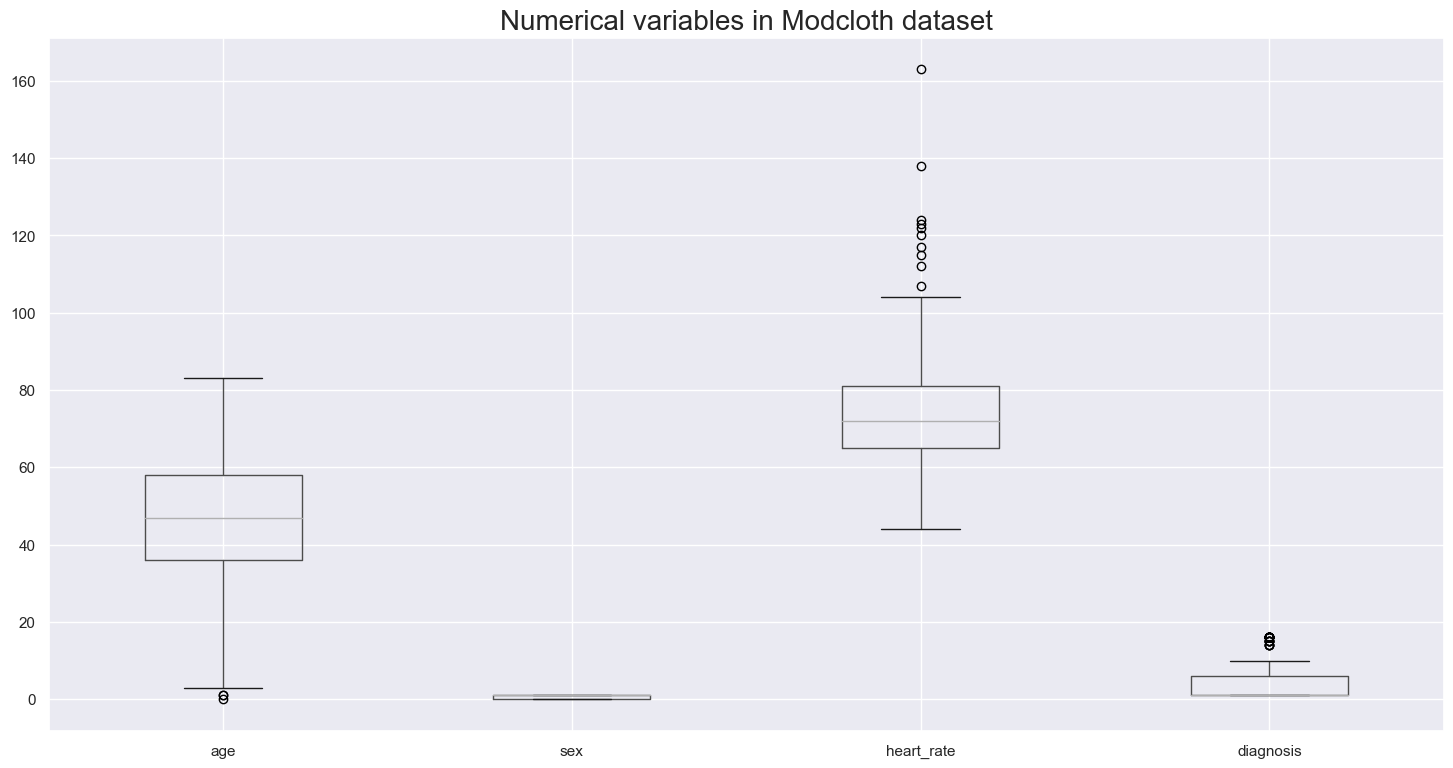

In [30]:
num_cols = ['age', 'sex', 'heart_rate', 'diagnosis']
plt.figure(figsize=(18, 9))
df[num_cols].boxplot()
plt.title('Numerical variables in Modcloth dataset', fontsize=20)
plt.show()

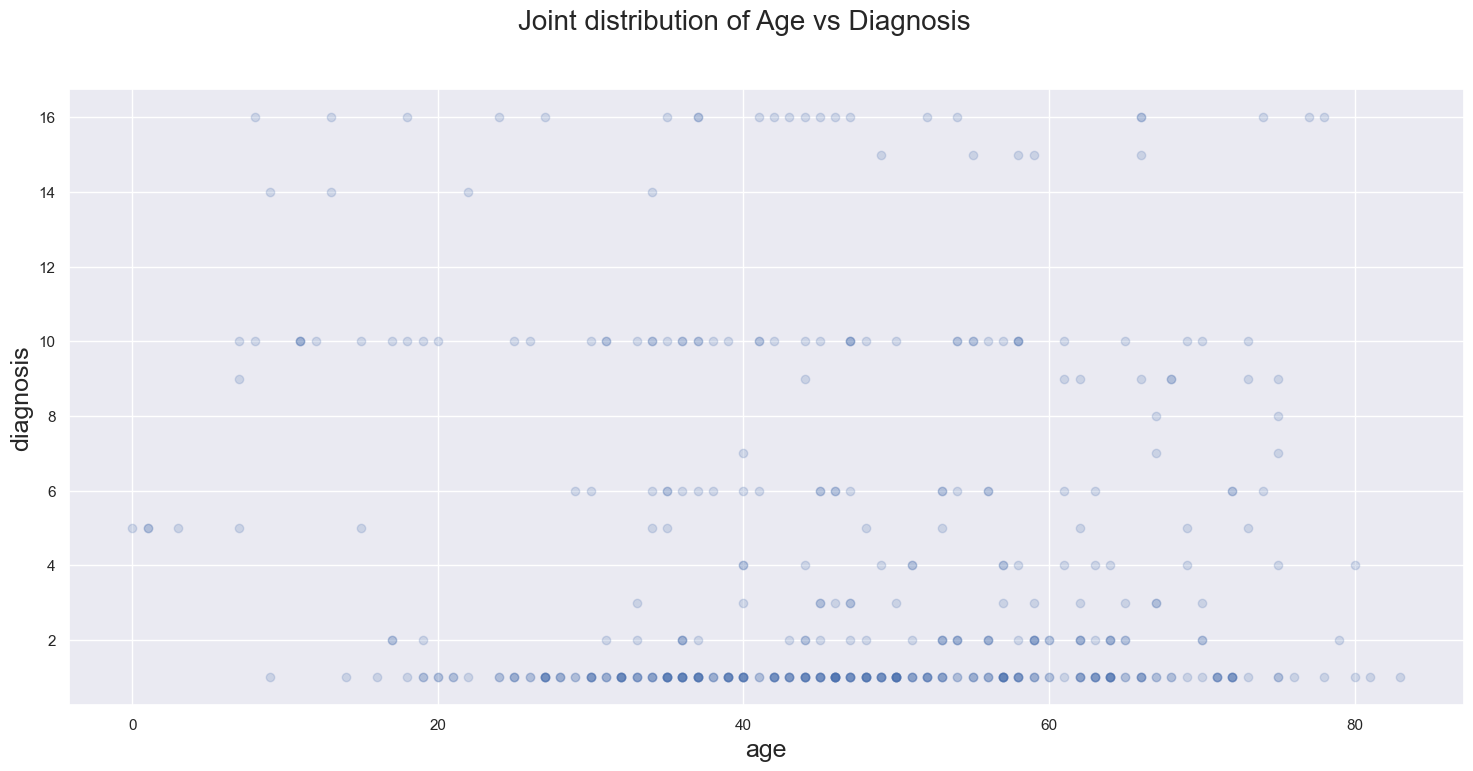

In [31]:
plt.figure(figsize=(18, 8))
plt.xlabel('age', fontsize=18)
plt.ylabel('diagnosis', fontsize=18)
plt.suptitle('Joint distribution of Age vs Diagnosis', fontsize=20)
plt.plot(df.age, df['diagnosis'], 'bo', alpha=0.2)
plt.show()

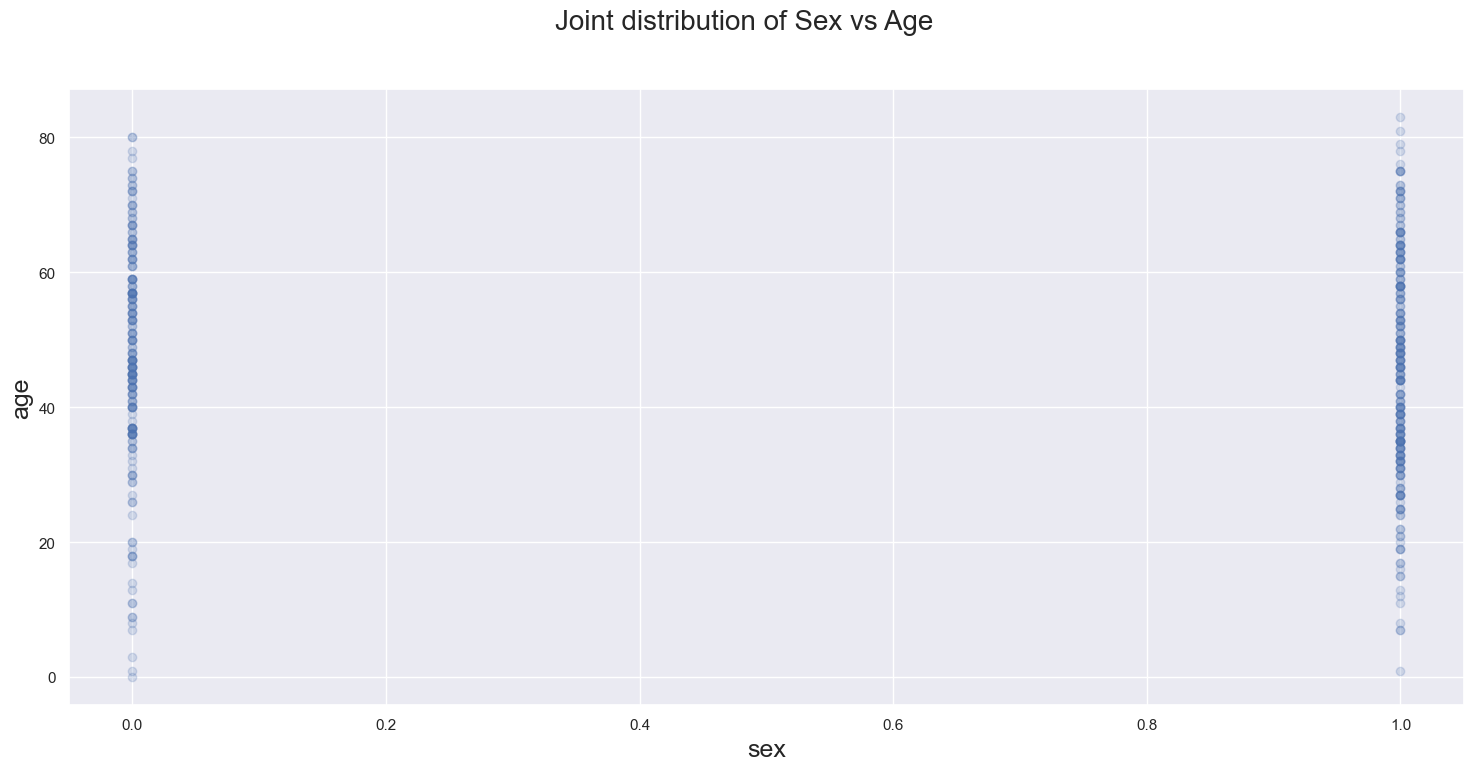

In [32]:
plt.figure(figsize=(18, 8))
plt.xlabel('sex', fontsize=18)
plt.ylabel('age', fontsize=18)
plt.suptitle('Joint distribution of Sex vs Age', fontsize=20)
plt.plot(df.sex, df['age'], 'bo', alpha=0.2)
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

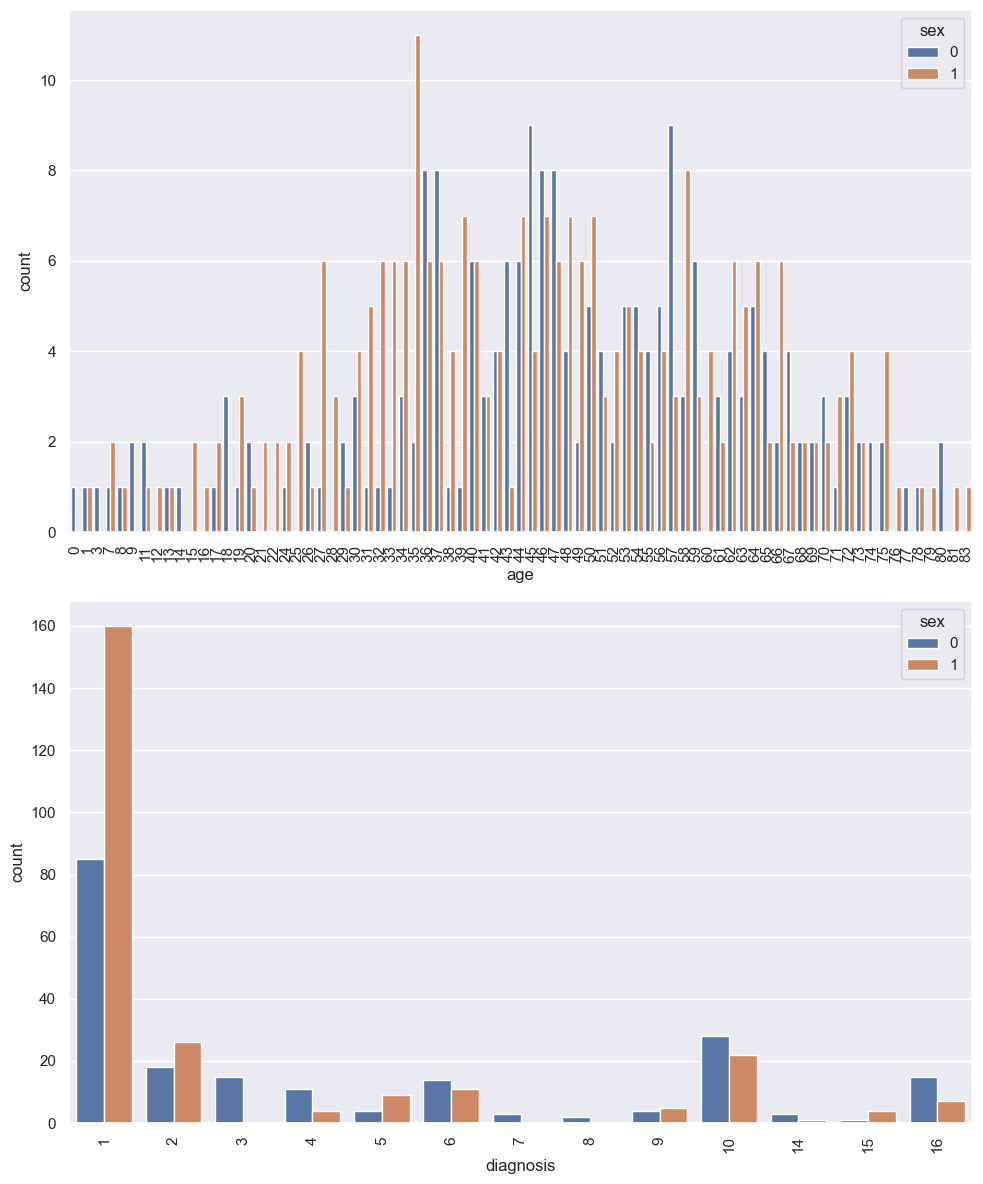

In [51]:
cat_var = ['age', 'diagnosis']
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
axs = axs.flatten()

for i, var in enumerate(cat_var):
    sns.countplot(x=var, hue='sex', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()
fig.delaxes(axs[2])
plt.show()